In [11]:
import pandas as pd  
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
# Convertir el dataframe de pandas a R
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter



## Lectura de dataset original

In [5]:

ruta_file = os.getcwd()
print("La ruta del archivo :", ruta_file)
dt=pd.read_csv(ruta_file+"/ObesityDataSet_raw_and_data_sinthetic.csv")

La ruta del archivo : c:\Users\Benjamin Villacorta\Documents\Python\CursoML\Evaluacion3


## Validamos estructura del DF

In [62]:
# Validamos estructura del dataframe
dt.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [63]:
dt.Height.describe()    

count    2111.000000
mean        1.701677
std         0.093305
min         1.450000
25%         1.630000
50%         1.700499
75%         1.768464
max         1.980000
Name: Height, dtype: float64

In [64]:
dt.Weight.describe()  

count    2111.000000
mean       86.586058
std        26.191172
min        39.000000
25%        65.473343
50%        83.000000
75%       107.430682
max       173.000000
Name: Weight, dtype: float64

In [65]:
dt.Gender.value_counts()                                           

Gender
Male      1068
Female    1043
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

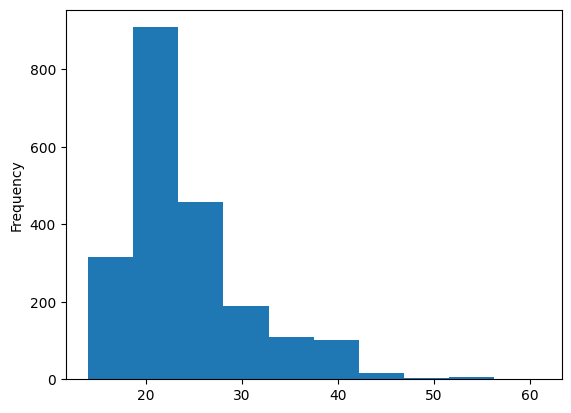

In [45]:
dt.Age.describe()
dt.Age.plot(kind="hist")   

In [40]:
dt.family_history_with_overweight.value_counts(normalize=True)


family_history_with_overweight
yes    0.817622
no     0.182378
Name: proportion, dtype: float64

## Agregue un genero mas para diversificar la data

In [6]:
dt.loc[(dt['Age'] >= 19) & (dt['Age'] <= 23), 'Gender'] = 'NB'

In [73]:
dt.Gender.describe()

count     2111
unique       3
top         NB
freq       844
Name: Gender, dtype: object

In [74]:
dt.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,NB,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,NB,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,NB,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,NB,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Limpieza de strings categoricos

In [7]:
dt["family_history_with_overweight"]=dt["family_history_with_overweight"].str.upper().str.replace("_"," ")
dt["MTRANS"]=dt["MTRANS"].str.upper().str.replace("_"," ")
dt["NObeyesdad"]=dt["NObeyesdad"].str.upper().str.replace("_"," ")

In [253]:
dt[["family_history_with_overweight","MTRANS","NObeyesdad","Weight"]].head(10)
#dt[(dt['AgeGroup'] == "70-100") & (dt['Gender'] == "NB")]
#dt.isna().any()

,family_history_with_overweight,MTRANS,NObeyesdad,Weight
0,YES,PUBLIC TRANSPORTATION,NORMAL WEIGHT,64.0
1,YES,PUBLIC TRANSPORTATION,NORMAL WEIGHT,56.0
2,YES,PUBLIC TRANSPORTATION,NORMAL WEIGHT,77.0
3,NO,WALKING,OVERWEIGHT LEVEL I,87.0
4,NO,PUBLIC TRANSPORTATION,OVERWEIGHT LEVEL II,89.8
5,NO,AUTOMOBILE,NORMAL WEIGHT,53.0
6,YES,MOTORBIKE,NORMAL WEIGHT,55.0
7,NO,PUBLIC TRANSPORTATION,NORMAL WEIGHT,53.0
8,YES,PUBLIC TRANSPORTATION,NORMAL WEIGHT,64.0
9,YES,PUBLIC TRANSPORTATION,NORMAL WEIGHT,68.0


# Creo rangos de edad para realizar agrupaciones

In [8]:
# Defino bins para las edades 
bins = [0, 18, 30, 50,70,100]
labels = ['0-18', '19-30', '31-50', '51-69','70-100']
dt['AgeGroup'] = pd.cut(dt['Age'], bins=bins, labels=labels, right=False)
# Creo una clasificacion para hacer una grupo mas pequeño de tipos de sobrepeso
clasificaciones = {
    'NORMAL WEIGHT':'PESO NORMAL',
    'INSUFFICIENT WEIGHT': 'PESO INSUFICIENTE',
    'OBESITY TYPE I': 'OBESIDAD',
    'OBESITY TYPE II': 'OBESIDAD',
    'OBESITY TYPE III': 'OBESIDAD',
    'OVERWEIGHT LEVEL I': 'SOBREPESO',
    'OVERWEIGHT LEVEL II': 'SOBREPESO'
}

# Aplica clasificacion
dt["TipoPeso"] = dt['NObeyesdad'].map(clasificaciones).fillna(dt['NObeyesdad'])


dt_ag= dt.groupby(["family_history_with_overweight", "Gender", "AgeGroup", "TipoPeso"]).agg(
    promedio_Weight=("Weight", "mean"),
    cantidad_registros=("Weight", "size")
).reset_index()

dt_ag[['promedio_Weight', 'cantidad_registros']] = dt_ag[['promedio_Weight', 'cantidad_registros']].fillna(0)


C:\Users\Benjamin Villacorta\AppData\Local\Temp\ipykernel_2388\1683890302.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dt_ag= dt.groupby(["family_history_with_overweight", "Gender", "AgeGroup", "TipoPeso"]).agg(


In [9]:
pivot_df = dt_ag.pivot_table(index=['family_history_with_overweight', 'Gender'], 
                             columns='TipoPeso', 
                             values='cantidad_registros', 
                             aggfunc='sum').fillna(0)

# agrupo clasificacion y los asigno a un nuevo dataframe
dt_ag2 = dt_ag.groupby('TipoPeso')['cantidad_registros'].sum().reset_index()
# Agrupo por clasificiacion y genero
dt_ag3 = dt_ag.groupby(['TipoPeso','Gender','AgeGroup'])['cantidad_registros'].sum().reset_index()

C:\Users\Benjamin Villacorta\AppData\Local\Temp\ipykernel_2388\4023272659.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dt_ag3 = dt_ag.groupby(['TipoPeso','Gender','AgeGroup'])['cantidad_registros'].sum().reset_index()


In [18]:
with localconverter(robjects.default_converter + pandas2ri.converter):
    r_pivot_df = robjects.conversion.py2rpy(pivot_df)

# Importar ggplot2 en R
importr('ggplot2')

# Definir el código R como una cadena de texto
r_code = """
library(ggplot2)
ggplot(r_pivot_df, aes(x = factor(Tiene_antecedentes_familiares), fill = factor(Niveles_de_sobrepeso_obesidad))) +
  geom_bar(position = "stack", stat = "identity") +
  labs(x = 'Tiene antecedentes familiares con sobrepeso',
       y = 'Cantidad de casos',
       title = 'Relación de antecedentes familiares de personas con sobrepeso',
       fill = 'Niveles de sobrepeso/obesidad') +
  theme_minimal()
"""

# Pasar el dataframe a R
robjects.globalenv['r_pivot_df'] = r_pivot_df

# Ejecutar el código R
robjects.r(r_code)


<rpy2.robjects.vectors.ListVector object at 0x000001AAA9B752D0> [19]
R classes: ('gg', 'ggplot')
[ListSexpV..., ListSexpV..., SexpEnvir..., SexpEnvir..., ..., SexpEnvir..., SexpEnvir..., SexpEnvir..., ListSexpV...]
<rpy2.robjects.vectors.ListVector object at 0x000001AAA9B752D0> [19]
R classes: ('gg', 'ggplot')
[ListSexpV..., ListSexpV..., SexpEnvir..., SexpEnvir..., ..., SexpEnvir..., SexpEnvir..., SexpEnvir..., ListSexpV...]
<rpy2.robjects.vectors.ListVector object at 0x000001AAA9B752D0> [19]
R classes: ('gg', 'ggplot')
[ListSexpV..., ListSexpV..., SexpEnvir..., SexpEnvir..., ..., SexpEnvir..., SexpEnvir..., SexpEnvir..., ListSexpV...]
  scales: <class 'rpy2.robjects.environments.Environment'>
  <rpy2.robjects.environments.Environment object at 0x000001AAA9B75110> [4]
R classes: ('ScalesList', 'ggproto', 'gg')
n items: 2
  guides: <class 'rpy2.robjects.environments.Environment'>
  <rpy2.robjects.environments.Environment object at 0x000001AAA9B76D10> [4]
R classes: ('Guides', 'ggproto', 'gg')
n items: 2
...
  theme: <class 'rpy2.robjects.environments.Environment'>
  <rpy2.robjects.environments.Environment object at 0x000001AAA9B75710> [4]
R classes: ('FacetNull', 'Facet', 'ggproto', 'gg')
n items: 2
  coordinates: <class 'rpy2.robjects.environments.Environment'>
  <rpy2.robjects.environments.Environment object at 0x000001AAA9B76510> [4]
R classes: ('environment',)
n items: 7
  facet: <class 'rpy2.robjects.environments.Environment'>
  <rpy2.robjects.environments.Environment object at 0x000001AAA9B755D0> [4]
R classes: ('Layout', 'ggproto', 'gg')
n items: 1
<rpy2.robjects.vectors.ListVector object at 0x000001AAA9B752D0> [19]
R classes: ('gg', 'ggplot')
[ListSexpV..., ListSexpV..., SexpEnvir..., SexpEnvir..., ..., SexpEnvir..., SexpEnvir..., SexpEnvir..., ListSexpV...]

### Dado el resultado anterior podemos determinar que existe una estrecha relacion donde una gran cantidad de personas sobre peso tiene antecedentes familiares

In [11]:

# Crear un dataframe de ejemplo similar a dt_ag2 en Python
dt_ag2 = pd.DataFrame({
    'TipoPeso': ['Bajo', 'Medio', 'Alto', 'Muy Alto'],
    'cantidad_registros': [10, 20, 30, 40]
})

# Convertir el dataframe de pandas a R usando un convertidor local
with localconverter(robjects.default_converter + pandas2ri.converter):
    r_dt_ag2 = robjects.conversion.py2rpy(dt_ag2)

# Importar las librerías necesarias en R
importr('graphics')

# Definir el código R como una cadena de texto
r_code = """
pie(r_dt_ag2$cantidad_registros, labels = r_dt_ag2$TipoPeso, 
    main = 'Distribución de pesos de la población', 
    col = rainbow(length(r_dt_ag2$TipoPeso)), 
    init.angle = 140)
"""

# Pasar el dataframe a R
robjects.globalenv['r_dt_ag2'] = r_dt_ag2

# Ejecutar el código R
robjects.r(r_code)

: 

### Acá se puede notar claramente que el segmento mayoritario son las personas con problemas de obesidad Y que el peso normal tiene distribución cercana al pesos insuficiente, esto quiere decir que gran parte del dataset mas 75%, son personas con problemas de salud alimentaria

In [15]:
# Convertir el dataframe de pandas a R usando un convertidor local
with localconverter(robjects.default_converter + pandas2ri.converter):
    r_dt_ag3 = robjects.conversion.py2rpy(dt_ag3)

# Importar ggplot2 en R
importr('ggplot2')

# Definir el código R como una cadena de texto
r_code = """
colors <- c('Female' = 'red', 'Male' = 'blue', 'NB' = 'green')
p <- ggplot(r_dt_ag3, aes(x = cantidad_registros, y = TipoPeso, color = Gender)) +
  geom_point(size = 3) +
  scale_color_manual(values = colors) +
  labs(title = 'Relación entre Cantidad y Tipo de Obesidad',
       x = 'Cantidad',
       y = 'Tipo de Obesidad') +
  theme_minimal()
print(p)
"""

# Pasar el dataframe a R
robjects.globalenv['r_dt_ag3'] = r_dt_ag3

# Ejecutar el código R
robjects.r(r_code)

### De  la siguiente visualizacion me quedan claro dos 2 cosas: En la poblacion femenina hay un tasa alta de peso insuficiente y la poblacion masculina tiene una tasa alta de obesidad mientras que la poblacion no binaria tiene una tasa alta de sobre peso

In [16]:
# Convertir el dataframe de pandas a R usando un convertidor local
with localconverter(robjects.default_converter + pandas2ri.converter):
    r_dt_ag3 = robjects.conversion.py2rpy(dt_ag3)

# Importar las libreras necesarias en R
importr('ggplot2')
importr('dplyr')

# Definir el codigo R como una cadena de texto
r_code = """
library(ggplot2)
library(dplyr)

# Agrupar y sumar los datos
dt_ag3_summary <- r_dt_ag3 %>%
  group_by(AgeGroup, TipoPeso, Gender) %>%
  summarise(cantidad_registros = sum(cantidad_registros)) %>%
  ungroup()

# Crear el gráfico de barras agrupadas
p <- ggplot(dt_ag3_summary, aes(x = interaction(AgeGroup, TipoPeso), y = cantidad_registros, fill = Gender)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(x = 'Rango de edad y tipo peso',
       y = 'Cantidad',
       title = 'Distribución de Cantidad por rango de edad, tipo de peso y Género',
       fill = 'Género') +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Mostrar el gráfico
print(p)
"""

# Pasar el dataframe a R
robjects.globalenv['r_dt_ag3'] = r_dt_ag3

# Ejecutar el código R
robjects.r(r_code)

`summarise()` has grouped output by 'AgeGroup', 'TipoPeso'. You can override
using the `.groups` argument.


### Se creo la clasificiacion rango edad - tipo de pesos y se busca analizar la distribución entre los generos

In [17]:
with localconverter(robjects.default_converter + pandas2ri.converter):
    r_dt_ag = robjects.conversion.py2rpy(dt_ag)

# Importar las librerías necesarias en R
importr('ggplot2')
importr('dplyr')

# Definir el codigo R como una cadena de texto
r_code = """
library(ggplot2)
library(dplyr)

# Agrupar y sumar los datos
dt_ag_summary <- r_dt_ag %>%
  group_by(AgeGroup, TipoPeso, Gender) %>%
  summarise(promedio_Weight = sum(promedio_Weight)) %>%
  ungroup()

# Crear el gráfico de barras agrupadas
p <- ggplot(dt_ag_summary, aes(x = interaction(AgeGroup, TipoPeso), y = promedio_Weight, fill = Gender)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(x = 'Rango de edad y tipo peso',
       y = 'Promedio',
       title = 'Distribución de Cantidad por rango de edad, tipo de peso y Género',
       fill = 'Género') +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Mostrar el gráfico
print(p)
"""

# Pasar el dataframe a R
robjects.globalenv['r_dt_ag'] = r_dt_ag

# Ejecutar el código R
robjects.r(r_code)

`summarise()` has grouped output by 'AgeGroup', 'TipoPeso'. You can override
using the `.groups` argument.


### Vista de promedio de los tipos de pesos por rango de edad y apilado por genero